               precision    recall  f1-score   support

Bright Winter       0.97      0.99      0.98       201
 Clear Spring       0.89      0.82      0.86       216
  Cool Summer       0.71      0.79      0.75       185
  Dark Winter       0.99      1.00      1.00       201
  Deep Autumn       0.77      0.71      0.74       195
  Deep Winter       0.95      1.00      0.98       210
 Light Spring       0.86      0.88      0.87       200
 Light Summer       0.80      0.77      0.79       222
  Soft Autumn       0.72      0.81      0.76       186
  Soft Summer       0.88      0.88      0.88       189
  Warm Autumn       0.77      0.73      0.75       187
  Warm Spring       0.89      0.82      0.85       208

     accuracy                           0.85      2400
    macro avg       0.85      0.85      0.85      2400
 weighted avg       0.85      0.85      0.85      2400

Predicted Season: Warm Autumn
Recommended Colors: #CC4E5C,#FFDF00,#6B8E23,#CC5500,#8B0000,#964B00,#FF6347
Not Recomme

c:\users\-\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


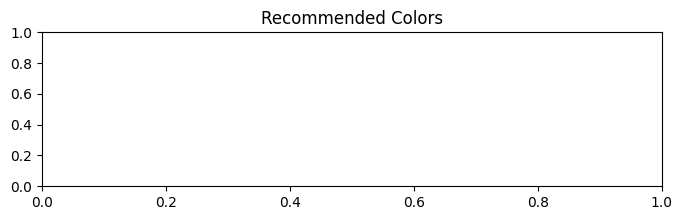

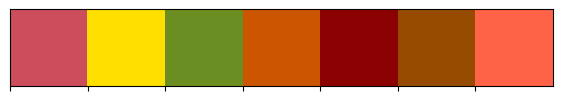

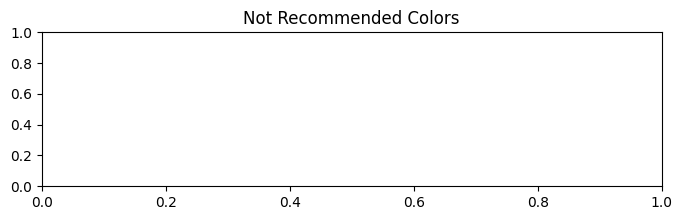

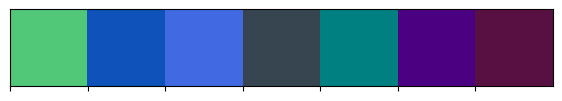

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the CSV file into a DataFrame
df = pd.read_csv('all_seasons_data.csv')

# Ensure column names match exactly as in your CSV file
# Adjust column names if necessary
df.rename(columns={
    'Hair_R': 'hair_r',
    'Hair_G': 'hair_g',
    'Hair_B': 'hair_b',
    'Skin_R': 'skin_r',
    'Skin_G': 'skin_g',
    'Skin_B': 'skin_b',
    'Eye_R': 'eye_r',
    'Eye_G': 'eye_g',
    'Eye_B': 'eye_b',
    'Season': 'season',
    'Recommended_Colors': 'recommended_colors',
    'Not_Recommended_Colors': 'not_recommended_colors'
}, inplace=True)

# Scale RGB values to a suitable format (e.g., between 0 and 1)
df['hair_r'] = df['hair_r'] / 255.0
df['hair_g'] = df['hair_g'] / 255.0
df['hair_b'] = df['hair_b'] / 255.0
df['skin_r'] = df['skin_r'] / 255.0
df['skin_g'] = df['skin_g'] / 255.0
df['skin_b'] = df['skin_b'] / 255.0
df['eye_r'] = df['eye_r'] / 255.0
df['eye_g'] = df['eye_g'] / 255.0
df['eye_b'] = df['eye_b'] / 255.0

# Split data into features (X) and target (y)
X = df[['hair_r', 'hair_g', 'hair_b', 'skin_r', 'skin_g', 'skin_b', 'eye_r', 'eye_g', 'eye_b']]
y = df['season']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest Classifier with feature names
feature_names = X.columns.tolist()  # Get column names as feature names
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate model performance
print(classification_report(y_test, y_pred))

# Example prediction for a new data point (replace with actual RGB values)
new_data = [[0.3, 0.4, 0.2, 0.8, 0.7, 0.6, 0.5, 0.3, 0.1]]  # Example RGB values scaled between 0 and 1
predicted_season = rf_classifier.predict(new_data)
predicted_row = df[df['season'] == predicted_season[0]].iloc[0]

print(f"Predicted Season: {predicted_season[0]}")
print(f"Recommended Colors: {predicted_row['recommended_colors']}")
print(f"Not Recommended Colors: {predicted_row['not_recommended_colors']}")

# Visualize recommended and not recommended colors
def plot_color_palette(colors, title):
    fig, ax = plt.subplots(figsize=(8, 2))
    sns.palplot(colors.split(','))
    ax.set_title(title)
    plt.show()

plot_color_palette(predicted_row['recommended_colors'], "Recommended Colors")
plot_color_palette(predicted_row['not_recommended_colors'], "Not Recommended Colors")
